In [1]:
import os
os.environ['SETIGEN_ENABLE_GPU'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
import blimpy as bl

import sys
sys.path.insert(0, "/mnt_home/bryanb/setigen/")
import setigen as stg

bshuf filter already loaded, skip it.
lz4 filter already loaded, skip it.
zfp filter already loaded, skip it.


In [2]:
%matplotlib inline

Blocks: 100%|██████████| 1/1 [00:08<00:00,  8.08s/it]     


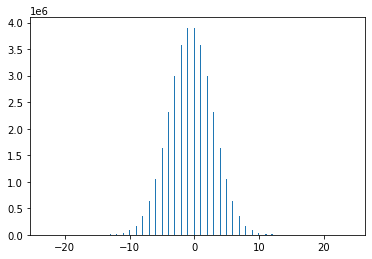

Pol 0, comp 0: mean -0.5001863837242126, std 3.4096309822512785, fwhm 8.029067383163875


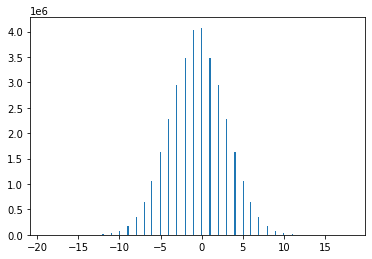

Pol 0, comp 1: mean -0.4997541308403015, std 3.4102117438746795, fwhm 8.030434972276044


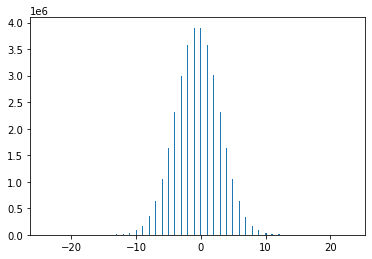

Pol 1, comp 0: mean -0.4998076260089874, std 3.409551817114956, fwhm 8.028880963513997


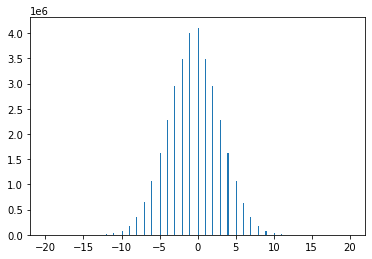

Pol 1, comp 1: mean -0.49755507707595825, std 3.4100077201221617, fwhm 8.029954533053953


In [4]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

chan_bw = sample_rate / num_branches

antenna = stg.voltage.Antenna(sample_rate=sample_rate, 
                              fch1=6*u.GHz,
                              ascending=True,
                              num_pols=2)

for stream in antenna.streams:
    stream.add_noise(0, 1)
    stream.add_constant_signal(f_start=6002.2e6, 
                               drift_rate=-2,
                               level=0.002,
                               phase=0)
    
digitizer = stg.voltage.RealQuantizer(target_mean=0, 
                                      target_fwhm=32,
                                      num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)

requantizer = stg.voltage.ComplexQuantizer(target_mean=-0.5,
                                           target_fwhm=8,
                                           num_bits=8)

rvb = stg.voltage.RawVoltageBackend(antenna,
                                    digitizer=digitizer,
                                    filterbank=filterbank,
                                    requantizer=requantizer,
                                    start_chan=0,
                                    num_chans=64,
                                    block_size=134217728,
                                    blocks_per_file=128,
                                    num_subblocks=32)

rvb.record(raw_file_stem='example_1block',
           num_blocks=1, 
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value',
                        'TELESCOP': 'GBT'},
           verbose=False)

get_dists('example_1block.0000.raw')

In [10]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

chan_bw = sample_rate / num_branches

antenna_params = {
    'fch1': 6e9,
    'ascending': True,
    'num_pols': 2,
    'random_non_whatever': 'Hello'
}

antenna = stg.voltage.Antenna(sample_rate=sample_rate, 
                              **antenna_params,
                              t_start=2)

vars(antenna)

{'rng': <cupy.random._generator.RandomState at 0x7f254cf9fb50>,
 'sample_rate': 3000000000.0,
 'dt': 3.333333333333333e-10,
 'fch1': 6000000000.0,
 'ascending': True,
 'num_pols': 2,
 't_start': 2,
 'start_obs': True,
 'x': <setigen.voltage.data_stream.DataStream at 0x7f254cf9fdc0>,
 'streams': [<setigen.voltage.data_stream.DataStream at 0x7f254cf9fdc0>,
 'y': <setigen.voltage.data_stream.DataStream at 0x7f254cf9fa30>,
 'delay': None,
 'bg_cache': [None, None]}

In [12]:
a = {1: 2, 3: 4}

class A():
    def __init__(self, a=0, b=1):
        self.a = a
        self.b = b

x = {'a': 5, 'b': 6}
vars(A(**x))

{'a': 5, 'b': 6}

In [ ]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

input_file_stem = 'example_1block'

start_chan = 0

# currently this is 'populate_pipeline_elements' in read_raw.ipynb
raw_params = stg.voltage.get_raw_params(input_file_stem=input_file_stem,
                                        start_chan=start_chan)
# sample_rate and delays aren't actually used by the raw file... this is just for convenience


# antenna = stg.voltage.Antenna(sample_rate=raw_params['sample_rate'], 
#                               fch1=raw_params['fch1'],
#                               ascending=raw_params['ascending'],
#                               num_pols=raw_params['num_pols'])

"""or"""
# accept dict, create antenna automatically! just expand dict; added kwargs to antennas 
# to accept these parameters!
antenna = stg.voltage.Antenna(sample_rate=sample_rate,
                              **raw_params)

# maa = stg.voltage.MultiAntennaArray(sample_rate, 
#                                     **raw_params, 
#                                     delays=None)

    
digitizer = stg.voltage.RealQuantizer(target_mean=0, 
                                      target_fwhm=32,
                                      num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)


rvb = stg.voltage.RawVoltageBackend(antenna,
                                    digitizer=digitizer,
                                    filterbank=filterbank,
                                    requantizer=requantizer,
                                    start_chan=0,
                                    num_chans=64,
                                    block_size=134217728,
                                    blocks_per_file=128,
                                    num_subblocks=32)




rvb = stg.voltage.RawVoltageBackend.from_data(antenna,
                                              digitizer=digitizer,
                                              filterbank=filterbank,
                                              start_chan=start_chan,
                                              input_file_stem=input_file_stem,
                                              num_subblocks=32)







rvb.record(output_file_stem='example_1block_input',
           num_blocks=1, 
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value',
                        'TELESCOP': 'GBT'},
           verbose=False)

get_dists('example_1block_input.0000.raw')

In [14]:
header = stg.voltage.read_header('example_1block.0000.raw')
header

{'BACKEND': "'GUPPI   '",
 'TELESCOP': "'GBT     '",
 'OBSERVER': "'SETIGEN '",
 'PROJID': "'AGBT20B_999_22'",
 'FRONTEND': "'RcvrArray18_26'",
 'NRCVR': '2',
 'FD_POLN': "'CIRC    '",
 'BMAJ': '0.009263915095687008',
 'BMIN': '0.009263915095687008',
 'SRC_NAME': "'SYNTHETIC'",
 'TRK_MODE': "'TRACK   '",
 'RA_STR': "'04:41:45.7920'",
 'RA': '70.4408',
 'DEC_STR': "'+25:41:27.9600'",
 'DEC': '25.6911',
 'LST': '83464',
 'AZ': '433.0963',
 'ZA': '69.1473',
 'DAQCTRL': "'start   '",
 'DAQPULSE': "'Tue Sep 22 00:24:27 2020'",
 'DAQSTATE': "'record  '",
 'NBITS': '8',
 'OFFSET0': '0.0',
 'OFFSET1': '0.0',
 'OFFSET2': '0.0',
 'OFFSET3': '0.0',
 'BANKNAM': "'BLP00   '",
 'TFOLD': '0',
 'DS_FREQ': '1',
 'DS_TIME': '1',
 'FFTLEN': '512',
 'CHAN_BW': '2.9296875',
 'BANDNUM': '0',
 'NBIN': '0',
 'OBSNCHAN': '64',
 'SCALE0': '1.0',
 'SCALE1': '1.0',
 'DATAHOST': "'blr2-1-10-0.gb.nrao.edu'",
 'SCALE3': '1.0',
 'NPOL': '4',
 'POL_TYPE': "'AABBCRCI'",
 'BANKNUM': '0',
 'DATAPORT': '60000',
 'ONLY_I':

In [27]:
"'" in header['NPKT']

False

In [28]:
for key, value in header.items():
    print(stg.voltage.format_header_line(key, value))

BACKEND = ''GUPPI   ''                                                          
TELESCOP= ''GBT     ''                                                          
OBSERVER= ''SETIGEN ''                                                          
PROJID  = ''AGBT20B_999_22''                                                    
FRONTEND= ''RcvrArray18_26''                                                    
NRCVR   = '2       '                                                            
FD_POLN = ''CIRC    ''                                                          
BMAJ    = '0.009263915095687008'                                                
BMIN    = '0.009263915095687008'                                                
SRC_NAME= ''SYNTHETIC''                                                         
TRK_MODE= ''TRACK   ''                                                          
RA_STR  = ''04:41:45.7920''                                                     
RA      = '70.4408 '        

In [29]:
for key, value in header.items():
    print(stg.voltage.format_header_line(key, value, as_strings=True))

BACKEND = 'GUPPI   '                                                            
TELESCOP= 'GBT     '                                                            
OBSERVER= 'SETIGEN '                                                            
PROJID  = 'AGBT20B_999_22'                                                      
FRONTEND= 'RcvrArray18_26'                                                      
NRCVR   =                    2                                                  
FD_POLN = 'CIRC    '                                                            
BMAJ    = 0.009263915095687008                                                  
BMIN    = 0.009263915095687008                                                  
SRC_NAME= 'SYNTHETIC'                                                           
TRK_MODE= 'TRACK   '                                                            
RA_STR  = '04:41:45.7920'                                                       
RA      =              70.44

In [39]:
np.arange(0, 10, 2)

[autoreload of setigen.voltage.backend failed: Traceback (most recent call last):
  File "/datax/scratch/bbrzycki/miniconda3/envs/bl_tf/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/datax/scratch/bbrzycki/miniconda3/envs/bl_tf/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/datax/scratch/bbrzycki/miniconda3/envs/bl_tf/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/datax/scratch/bbrzycki/miniconda3/envs/bl_tf/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File

array([0, 2, 4, 6, 8])

Blocks: 100%|██████████| 1/1 [00:09<00:00,  9.36s/it]     

working stem: example_1block_input
opening file: example_1block_input.0000.raw


opening file: example_1block_input.0001.raw [No such file or directory]
output product 0: 128 spectra


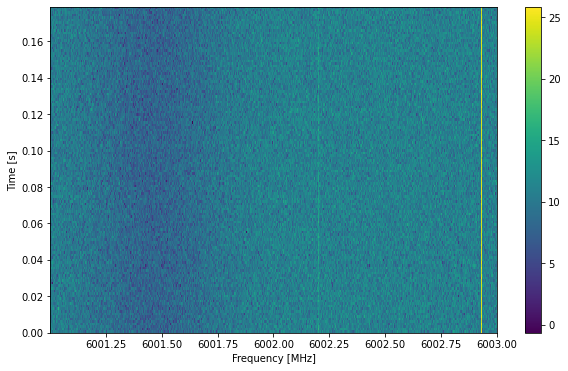

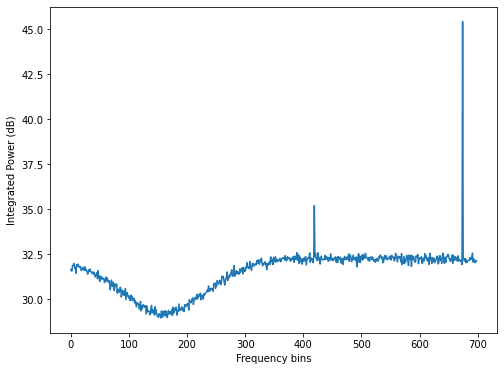

In [4]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

input_file_stem = 'example_1block'

start_chan = 0

# currently this is 'populate_pipeline_elements' in read_raw.ipynb
raw_params = stg.voltage.get_raw_params(input_file_stem=input_file_stem,
                                        start_chan=start_chan)
# sample_rate and delays aren't actually used by the raw file... this is just for convenience


# antenna = stg.voltage.Antenna(sample_rate=raw_params['sample_rate'], 
#                               fch1=raw_params['fch1'],
#                               ascending=raw_params['ascending'],
#                               num_pols=raw_params['num_pols'])

"""or"""
# accept dict, create antenna automatically! just expand dict; added kwargs to antennas 
# to accept these parameters!
antenna = stg.voltage.Antenna(sample_rate=sample_rate,
                              **raw_params)

# maa = stg.voltage.MultiAntennaArray(sample_rate, 
#                                     **raw_params, 
#                                     delays=None)

    
digitizer = stg.voltage.RealQuantizer(target_mean=0, 
                                      target_fwhm=32,
                                      num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)


rvb = stg.voltage.RawVoltageBackend.from_data(input_file_stem=input_file_stem,
                                              antenna_source=antenna,
                                              digitizer=digitizer,
                                              filterbank=filterbank,
                                              start_chan=start_chan,
                                              num_subblocks=32)


rvb.record(output_file_stem='example_1block_input',
           num_blocks=1, 
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value',
                        'TELESCOP': 'GBT'},
           verbose=False)

# get_dists('example_1block_input.0000.raw')
!rawspec -f 1024 -t 4 -d . example_1block_input

wf = bl.Waterfall('example_1block_input.rawspec.0000.fil',
                  f_start=6001.0,
                  f_stop=6003.0)

plt.figure(figsize=(10, 6))
wf.plot_waterfall()
plt.show()

x = stg.db(np.sum(wf.data[:, 0, :], axis=0))

plt.figure(figsize=(8, 6))
plt.plot(x)
plt.xlabel('Frequency bins')
plt.ylabel('Integrated Power (dB)')
plt.show()

## Create raw file and reload it into new file

Blocks: 100%|██████████| 1/1 [00:05<00:00,  5.30s/it]     

working stem: example_1block
opening file: example_1block.0000.raw


opening file: example_1block.0001.raw [No such file or directory]
output product 0: 128 spectra


Blocks: 100%|██████████| 1/1 [00:09<00:00,  9.30s/it]     

working stem: example_1block_input
opening file: example_1block_input.0000.raw


opening file: example_1block_input.0001.raw [No such file or directory]
output product 0: 128 spectra


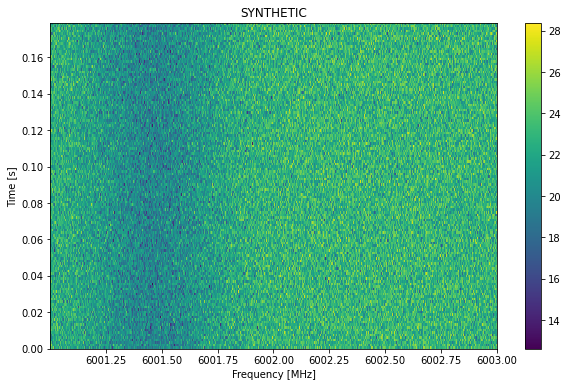

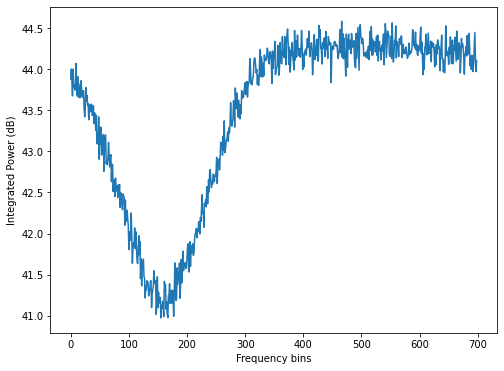

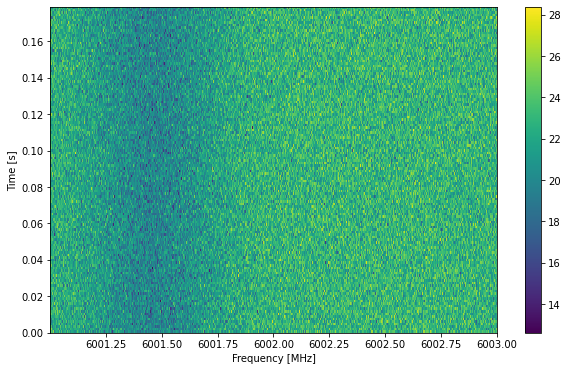

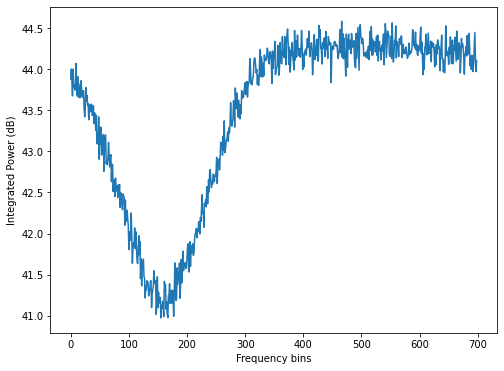

In [23]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

chan_bw = sample_rate / num_branches

antenna = stg.voltage.Antenna(sample_rate=sample_rate, 
                              fch1=6*u.GHz,
                              ascending=True,
                              num_pols=2)

for stream in antenna.streams:
    stream.add_noise(0, 1)
#     stream.add_constant_signal(f_start=6002.2e6, 
#                                drift_rate=-2,
#                                level=0.002,
#                                phase=0)
    
digitizer = stg.voltage.RealQuantizer(target_mean=0, 
                                      target_fwhm=32,
                                      num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)

requantizer = stg.voltage.ComplexQuantizer(target_mean=0,
                                           target_fwhm=32,
                                           num_bits=8)

rvb = stg.voltage.RawVoltageBackend(antenna,
                                    digitizer=digitizer,
                                    filterbank=filterbank,
                                    requantizer=requantizer,
                                    start_chan=0,
                                    num_chans=64,
                                    block_size=134217728,
                                    blocks_per_file=128,
                                    num_subblocks=32)

rvb.record(output_file_stem='example_1block',
           num_blocks=1, 
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value',
                        'TELESCOP': 'GBT'},
           verbose=False)

!rawspec -f 1024 -t 4 -d . example_1block

#####################################
sample_rate = 3e9
num_taps = 8
num_branches = 1024

input_file_stem = 'example_1block'

start_chan = 0

# currently this is 'populate_pipeline_elements' in read_raw.ipynb
raw_params = stg.voltage.get_raw_params(input_file_stem=input_file_stem,
                                        start_chan=start_chan)
# sample_rate and delays aren't actually used by the raw file... this is just for convenience


# antenna = stg.voltage.Antenna(sample_rate=raw_params['sample_rate'], 
#                               fch1=raw_params['fch1'],
#                               ascending=raw_params['ascending'],
#                               num_pols=raw_params['num_pols'])

"""or"""
# accept dict, create antenna automatically! just expand dict; added kwargs to antennas 
# to accept these parameters!
antenna = stg.voltage.Antenna(sample_rate=sample_rate,
                              **raw_params)

for stream in antenna.streams:
#     stream.add_noise(0, 1)
    stream.add_constant_signal(f_start=6002.2e6, 
                               drift_rate=-2,
                               level=0.002,
                               phase=0)

# maa = stg.voltage.MultiAntennaArray(sample_rate, 
#                                     **raw_params, 
#                                     delays=None)
    
digitizer = stg.voltage.RealQuantizer(target_mean=0, 
                                      target_fwhm=32,
                                      num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)

rvb = stg.voltage.RawVoltageBackend.from_data(input_file_stem=input_file_stem,
                                              antenna_source=antenna,
                                              digitizer=digitizer,
                                              filterbank=filterbank,
                                              start_chan=start_chan,
                                              num_subblocks=32)

rvb.record(output_file_stem='example_1block_input',
           num_blocks=1, 
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value',
                        'TELESCOP': 'GBT'},
           digitize=False,
           verbose=False)

# get_dists('example_1block_input.0000.raw')
!rawspec -f 1024 -t 4 -d . example_1block_input

wf = bl.Waterfall('example_1block.rawspec.0000.fil',
                  f_start=6001.0,
                  f_stop=6003)

plt.figure(figsize=(10, 6))
wf.plot_waterfall()
plt.show()

x = stg.db(np.sum(wf.data[:, 0, :], axis=0))

plt.figure(figsize=(8, 6))
plt.plot(x)
plt.xlabel('Frequency bins')
plt.ylabel('Integrated Power (dB)')
plt.show()

wf = bl.Waterfall('example_1block_input.rawspec.0000.fil',
                  f_start=6001.0,
                  f_stop=6003)

plt.figure(figsize=(10, 6))
wf.plot_waterfall()
plt.show()

x = stg.db(np.sum(wf.data[:, 0, :], axis=0))

plt.figure(figsize=(8, 6))
plt.plot(x)
plt.xlabel('Frequency bins')
plt.ylabel('Integrated Power (dB)')
plt.show()

In [20]:
np.mean(filterbank.window)

array(1.)

In [5]:
antenna = stg.voltage.Antenna(sample_rate=sample_rate,
                              **raw_params)

for stream in antenna.streams:
    stream.add_noise(0, 1)
    stream.add_constant_signal(f_start=6002.5e6, 
                               drift_rate=-2,
                               level=0.002,
                               phase=0)
    stream.update_noise()
    print(stream.noise_std)

0.9978895495879565
1.0014406136762521


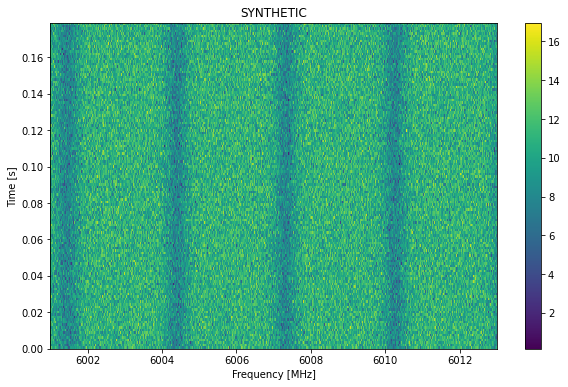

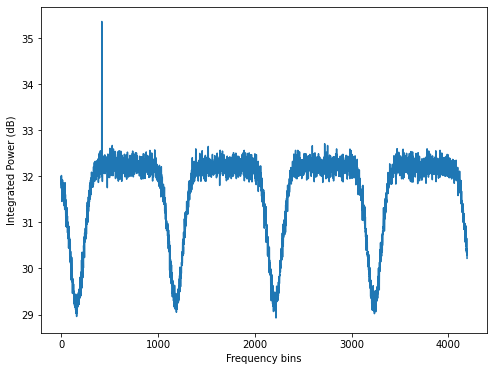

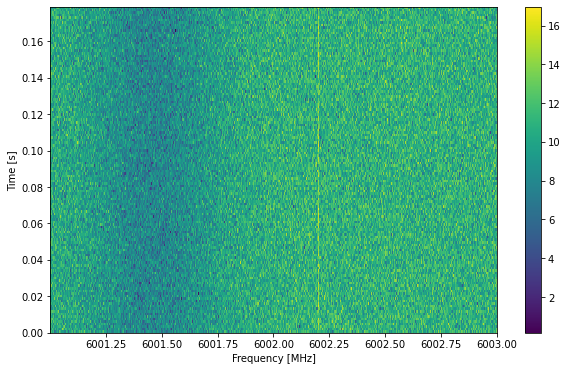

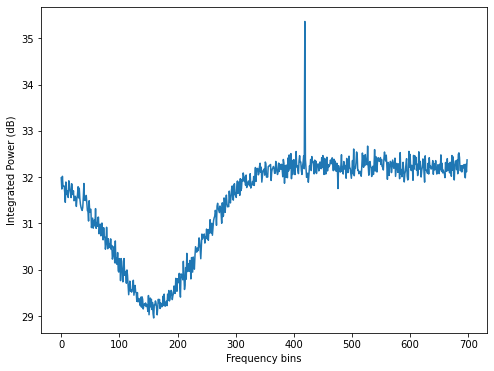

In [24]:
wf = bl.Waterfall('example_1block.rawspec.0000.fil',
                  f_start=6001.0,
                  f_stop=6013)

plt.figure(figsize=(10, 6))
wf.plot_waterfall()
plt.show()

x = stg.db(np.sum(wf.data[:, 0, :], axis=0))

plt.figure(figsize=(8, 6))
plt.plot(x)
plt.xlabel('Frequency bins')
plt.ylabel('Integrated Power (dB)')
plt.show()

wf = bl.Waterfall('example_1block_input.rawspec.0000.fil',
                  f_start=6001.0,
                  f_stop=6003)

plt.figure(figsize=(10, 6))
wf.plot_waterfall()
plt.show()

x = stg.db(np.sum(wf.data[:, 0, :], axis=0))

plt.figure(figsize=(8, 6))
plt.plot(x)
plt.xlabel('Frequency bins')
plt.ylabel('Integrated Power (dB)')
plt.show()

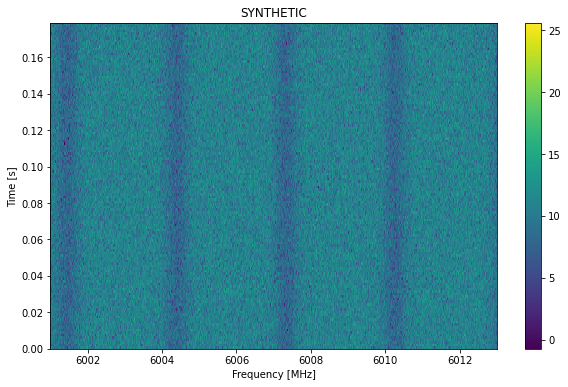

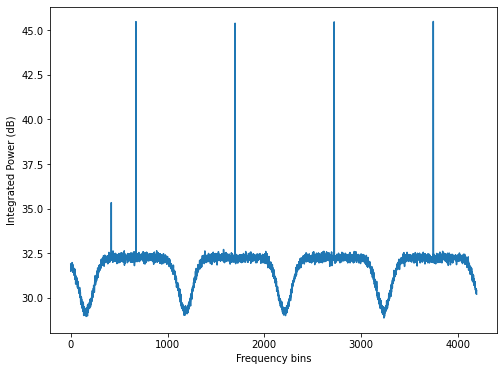

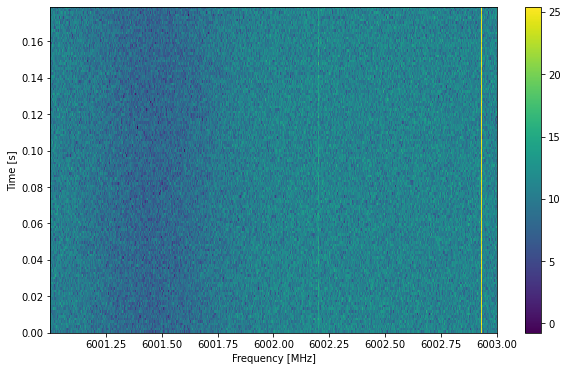

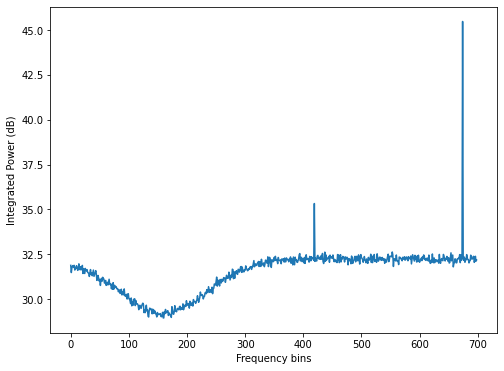

In [11]:
wf = bl.Waterfall('example_1block.rawspec.0000.fil',
                  f_start=6001.0,
                  f_stop=6013)

plt.figure(figsize=(10, 6))
wf.plot_waterfall()
plt.show()

x = stg.db(np.sum(wf.data[:, 0, :], axis=0))

plt.figure(figsize=(8, 6))
plt.plot(x)
plt.xlabel('Frequency bins')
plt.ylabel('Integrated Power (dB)')
plt.show()

wf = bl.Waterfall('example_1block_input.rawspec.0000.fil',
                  f_start=6001.0,
                  f_stop=6003)

plt.figure(figsize=(10, 6))
wf.plot_waterfall()
plt.show()

x = stg.db(np.sum(wf.data[:, 0, :], axis=0))

plt.figure(figsize=(8, 6))
plt.plot(x)
plt.xlabel('Frequency bins')
plt.ylabel('Integrated Power (dB)')
plt.show()

Subblocks:   0%|          | 0/64 [00:00<?, ?it/s]

6003.1000 MHz leakage factor: 1.487
6003.2000 MHz leakage factor: 1.514
6003.3000 MHz leakage factor: 1.392
6003.4000 MHz leakage factor: 1.295
6003.5000 MHz leakage factor: 1.217
6003.6000 MHz leakage factor: 1.154
6003.7000 MHz leakage factor: 1.105
6003.8000 MHz leakage factor: 1.066
6003.9000 MHz leakage factor: 1.037



Blocks: 100%|██████████| 1/1 [00:12<00:00, 12.51s/it]     

working stem: example_snr
opening file: example_snr.0000.raw


opening file: example_snr.0001.raw [No such file or directory]
output product 0: 128 spectra


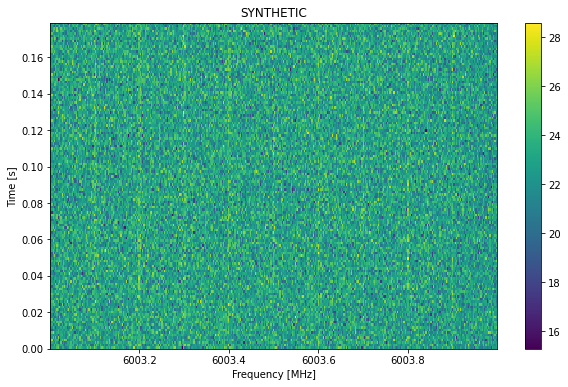

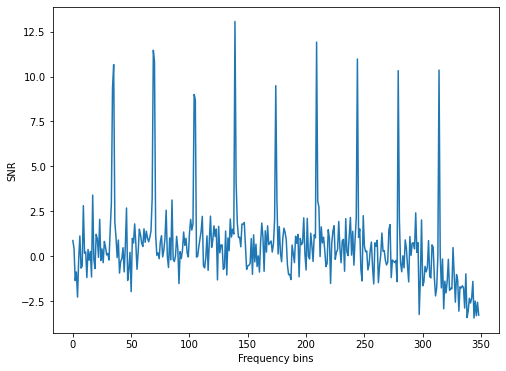

In [16]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

chan_bw = sample_rate / num_branches

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)

requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

antenna = stg.voltage.Antenna(sample_rate=sample_rate, 
                              fch1=6*u.GHz,
                              ascending=True,
                              num_pols=2)

rvb = stg.voltage.RawVoltageBackend(antenna,
                                    digitizer=digitizer,
                                    filterbank=filterbank,
                                    requantizer=requantizer,
                                    start_chan=0,
                                    num_chans=64,
                                    block_size=134217728,
                                    blocks_per_file=128,
                                    num_subblocks=32)

for stream in antenna.streams:
    stream.add_noise(v_mean=0, 
                     v_std=1)
    
fftlength = 1024
num_blocks = 1

signal_level = stg.voltage.get_level(snr=10, 
                                     raw_voltage_backend=rvb,
                                     fftlength=fftlength,
                                     num_blocks=num_blocks,
                                     length_mode='num_blocks')
for f_start in np.linspace(6003.1e6, 6003.9e6, 9):
    leakage_factor = stg.voltage.get_leakage_factor(f_start, rvb, fftlength)
    print(f'{f_start/1e6:.4f} MHz leakage factor: {leakage_factor:.3f}')
    
    for stream in antenna.streams:
        level = stream.get_total_noise_std() * leakage_factor * signal_level
        stream.add_constant_signal(f_start=f_start, 
                                   drift_rate=0*u.Hz/u.s, 
                                   level=level)
rvb.record(output_file_stem='example_snr',
           num_blocks=num_blocks, 
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value',
                        'TELESCOP': 'GBT'},
           verbose=False)
!rawspec -f 1024 -t 4 -d . example_snr

wf = bl.Waterfall('example_snr.rawspec.0000.fil',
                  f_start=6003.0,
                  f_stop=6004.0)

plt.figure(figsize=(10, 6))
wf.plot_waterfall()
plt.show()

frame = stg.Frame(wf)

spectrum = stg.integrate_frame(frame, normalize=True)

plt.figure(figsize=(8, 6))
plt.plot(spectrum)
plt.xlabel('Frequency bins')
plt.ylabel('SNR')
plt.show()

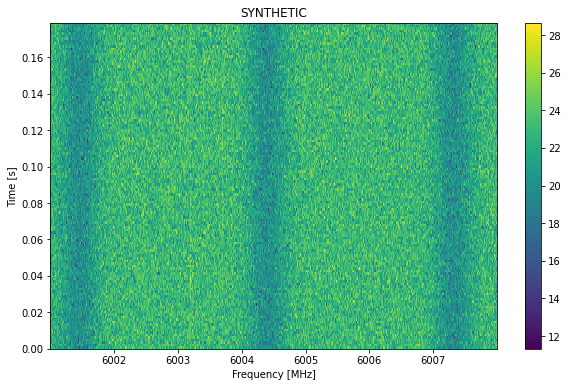

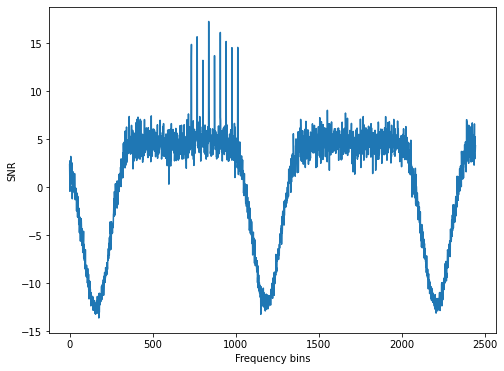

In [22]:
wf = bl.Waterfall('example_snr.rawspec.0000.fil',
                  f_start=6001.0,
                  f_stop=6008.0)

plt.figure(figsize=(10, 6))
wf.plot_waterfall()
plt.show()

frame = stg.Frame(wf)

spectrum = stg.integrate_frame(frame, normalize=True)

plt.figure(figsize=(8, 6))
plt.plot(spectrum)
plt.xlabel('Frequency bins')
plt.ylabel('SNR')
plt.show()